# Problem 1

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
# df.head()
# df.info()
df = df.dropna()
df_c = df[['Quantity','UnitPrice','CustomerID']]
df_c = df_c.groupby('CustomerID').sum()
df_c['F'] = df['CustomerID'].value_counts()
df_c['M'] = df_c['Quantity']*df_c['UnitPrice']
# df_c.info()
df_c.reset_index(inplace=True)
print(df_c.head())
print(f'> Null check \n', df_c.isnull().sum())
# df_cm = df_c[['CustomerID','F','M']].copy()
df_cm = df_c[['F','M']].copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cm) # Scaler applied
df_cms = pd.DataFrame(df_scaled,columns = df_cm.columns)
print(f'df_cms.head : {df_cms.head()}')
print(f'df_cms.info : {df_cms.info()}')
print(f'df_cms.describe : {df_cms.describe()}')

   CustomerID  Quantity  UnitPrice   F           M
0     12348.0      2341     178.71  31   418360.11
1     12349.0       631     605.10  73   381818.10
2     12350.0       197      65.30  17    12864.10
3     12352.0       470    2211.10  95  1039217.00
4     12354.0       530     261.22  58   138446.60
> Null check 
 CustomerID    0
Quantity      0
UnitPrice     0
F             0
M             0
dtype: int64
df_cms.head :           F         M
0 -0.245620 -0.085593
1 -0.126888 -0.085851
2 -0.285197 -0.088452
3 -0.064695 -0.081216
4 -0.169292 -0.087567
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       348 non-null    float64
 1   M       348 non-null    float64
dtypes: float64(2)
memory usage: 5.6 KB
df_cms.info : None
df_cms.describe :                   F             M
count  3.480000e+02  3.480000e+02
mean  -2.552237e-17 -2.552237e-17
std    1.

    F           M  class
0  31   418360.11      2
1  73   381818.10      2
2  17    12864.10      2
3  95  1039217.00      2
4  58   138446.60      2
class
2    345
0      2
1      1
Name: count, dtype: int64


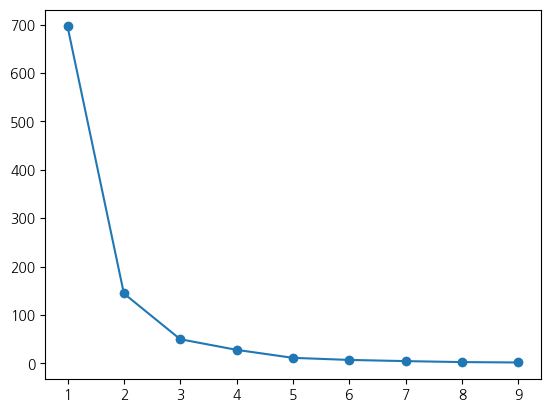

<Figure size 640x480 with 0 Axes>

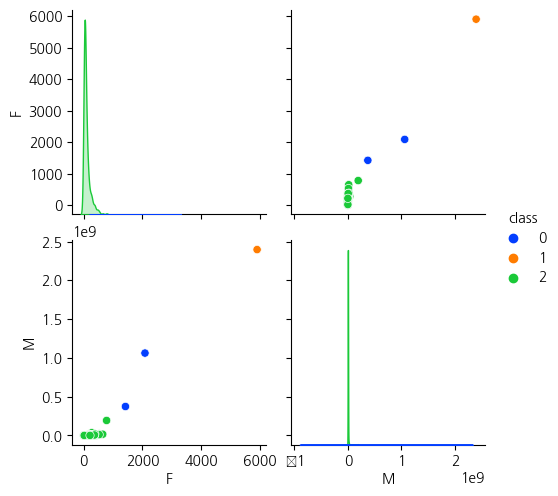

<Figure size 640x480 with 0 Axes>

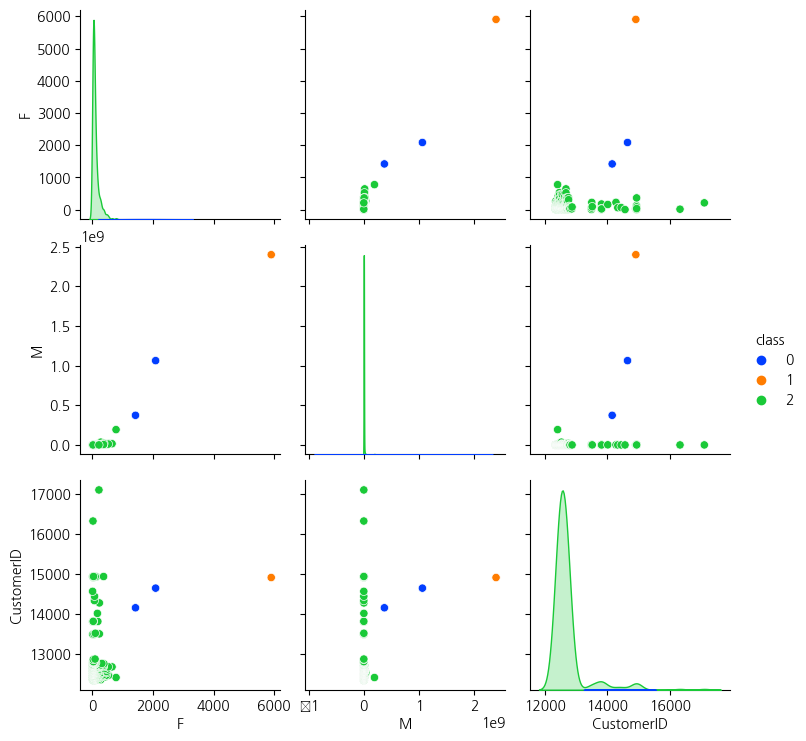

In [2]:
## Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns
# elbow test
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k, random_state=3 )
    model.fit(df_cms)
    inertias.append(model.inertia_)
plt.figure()
plt.plot(ks,inertias,'-o')
plt.draw()
cmodel = KMeans(n_clusters = 3, random_state=3 )
cmodel.fit(df_cms)
df_cm['class'] = cmodel.labels_
print(df_cm.head())
print(df_cm['class'].value_counts())
plt.figure()
sns.pairplot(df_cm, diag_kind='kde', hue='class',palette='bright')
plt.draw()
df_cm['CustomerID'] = df_c['CustomerID']
plt.figure()
sns.pairplot(df_cm, diag_kind='kde', hue='class',palette='bright')
plt.draw()

• 1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시  
CustomerID 를 기준으로 그룹화 하여, F,M feature 생성  
F,M feature 간의 절대값 차이가 크게 나타나 StandardScaler 로 상대적 크기 조정  
• 1.2 F, M feature 기반으로 군집분석 실시, 필요 이상값 보정 Kmeans 의 inertia_ 값을 기준  
으로 3개의 군집을 형성하였으나, 대분분이 2그룹으로 나타남 (0:2인,1:1인, 2:345인)  
• 1.3 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해 서술   
sns.pairplot의 F-M 결과를 보면, 구매빈도, 구매금액의 크기에 따라 군집화가 잘 이루어진 것으로
판단됨.  
• 1.4 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시 군집화 분석 결과, 대부분의 고
객이 낮은구매 빈도, 구매금액을 나타내고 있음  
매출 및 수익성 향상을 위해 우선적으로 고객들의 구매 빈도를 높일 수 있는 마케팅이 필요
하다고 판단됨.  

# Problem 2

   counts
0   544.3
1   603.1
2     NaN
3   533.4
4   619.5
null data 개수: counts    5
dtype: int64


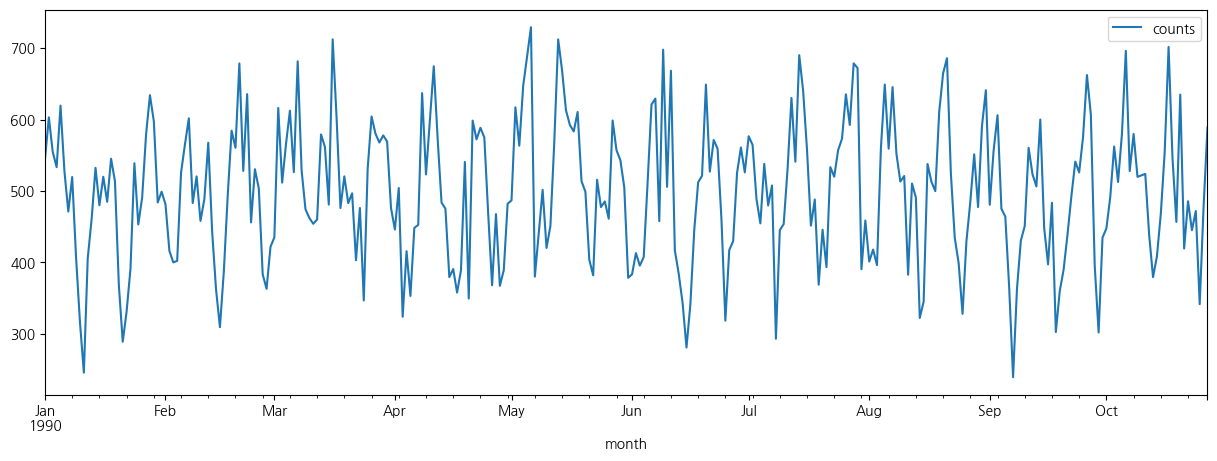

ADF statistics: -2.9023457794184195
p-value: 0.161457772409554
ADF statistics: -10.751909788620566
p-value: 6.706939730936419e-17
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  240
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1288.534
Date:                            Sun, 30 Jul 2023   AIC                           2587.067
Time:                                    21:17:28   BIC                           2604.214
Sample:                                01-01-1990   HQIC                          2593.985
                                     - 08-28-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

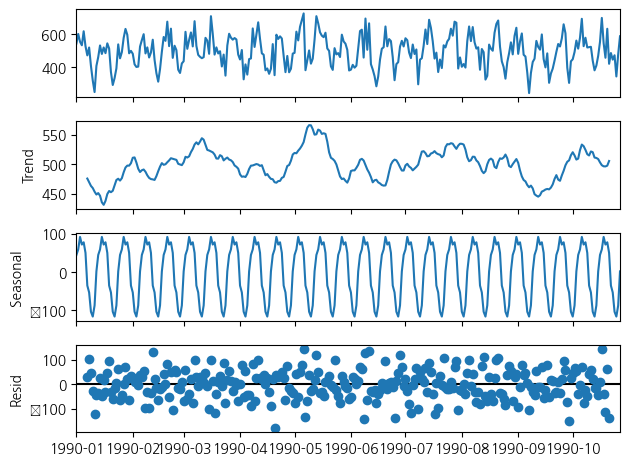

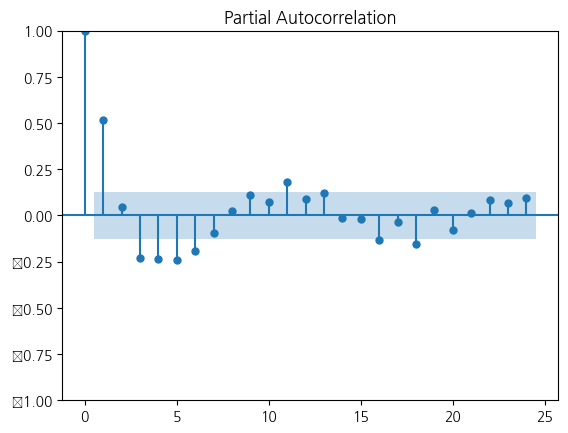

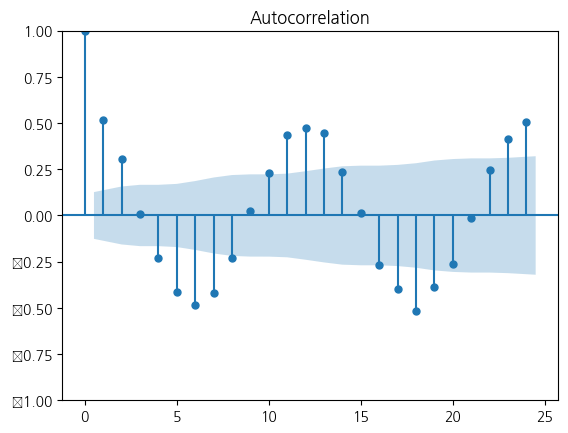

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col = 0)
print(df.head())
print(f'null data 개수: {df.isnull().sum()}')
df['counts'] = df['counts'].interpolate(method='polynomial', order=2)
df.dropna(inplace=True)
# df['month'] = pd.date_range('1990-01-01','2014-12-31', freq='MS')
df['month'] = pd.date_range('1990-01-01',periods= df.shape[0], freq='D')
# df['month'] = pd.period_range(start = '1990-01-01',periods = df.shape[0],freq= 'M')
df.set_index(df.month, inplace=True)
df.drop('month', axis=1, inplace=True)
df.plot(kind = 'line', figsize=(15, 5))
plt.show()
## Correlation Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose(df, model='additive', period = 12).plot()
sd = seasonal_decompose(df, model='additive', period=12)
sd.plot()
## data division : Training & Test
len_train = int(len(df)*0.8)
training = df[:len_train]
test = df.drop(training.index)
## Stationary Check
## 귀무가설 : 데이터가 정상성(stationary)을 갖지 않는다. (변동이 있다.)
## 대립가설 : 데이터가 정상성(stationary)을 갖는다
from statsmodels.tsa.stattools import adfuller
adf = adfuller(training, regression ='ct')
print(f'ADF statistics: {adf[0]}')
print(f'p-value: {adf[1]}')
d1_training = training.diff(1)
d1_training = d1_training.dropna()
adf_d1 = adfuller(d1_training, regression ='ct')
print(f'ADF statistics: {adf_d1[0]}')
print(f'p-value: {adf_d1[1]}')

##
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(training) # AR(p)
plot_acf(training) # MA(q)
## ARIMA Model
from pmdarima import auto_arima
arima_am = auto_arima(training, start_P=1, D=1 , start_Q=1,
max_P=2, max_D=1, max_Q=2, m=12,
seasonal=True, information_criterion='aic',stepwise=True)
print(arima_am.summary())
# plt.plot(training)
# plt.plot(tmodel.predict())
# plt.draw()

> 결정계수 R^2 = 0.46
> Root Mean Squared Error = 70.33


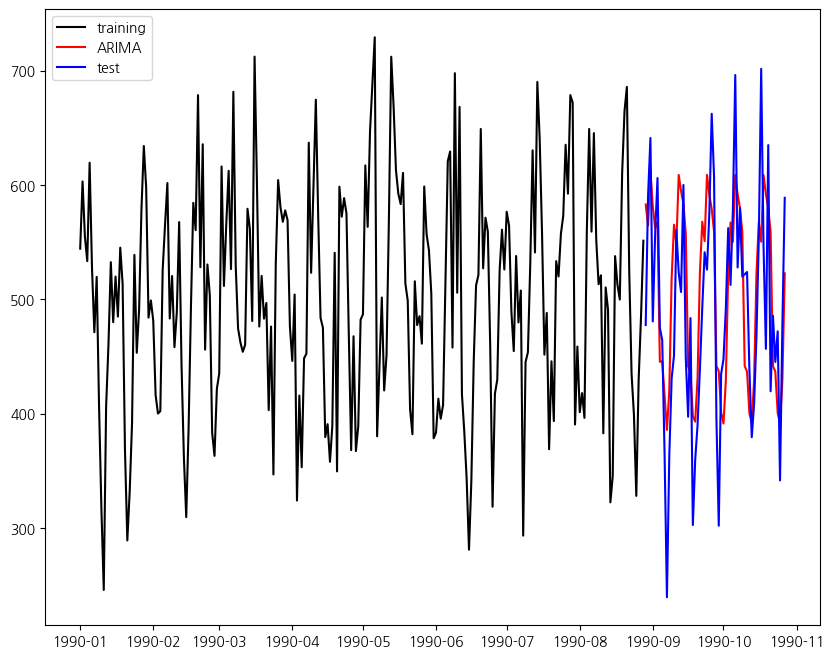

In [4]:
pred_t= pd.DataFrame(arima_am.predict(n_periods=len(test)),index=test.index)
pred_t.columns = ['predicted_counts']
plt.figure(figsize=(10,8))
plt.plot(training,'k-',label='training')
plt.plot(pred_t,'r-', label='ARIMA')
plt.plot(test,'b-', label='test')
plt.legend()
plt.draw()
from sklearn.metrics import r2_score, mean_squared_error
R2=r2_score(test['counts'], pred_t)
print(f'> 결정계수 R^2 = {round(R2,2)}')
rms_err = mean_squared_error(test['counts'], pred_t)**0.5
print(f'> Root Mean Squared Error = {round(rms_err,2)}')

• 2.1 EDA와 시각화를 진행하라 (관광지A의 1990년1월부터 25년 동안의 매달 평균 이용객 수)  
: 시계열 데이터로 변환하기 위해, pd.date_range 적용 및 Index 설정  
• 2.2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라  
: 시계열 데이터 이므로, dropna 를 사용하지 않고 interpolate 사용  
• 2.3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가  
: 정상성 확인을 위해 adfuller 적용 결과, 1차 차분한 경우부터 정상적으로 간주할 수 있음을 확인  
: 결정계수 Rˆ2 = 0.46이고 RMSE = 70.3 으로 정확도가 부족하다고 판단되며, 추가적인 최적 
모델 탐색이 필요함.
• 2.4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안  
: Peak 값 발생을 정확히 예측하지 못하기 떄문에, 실제적인 예측에 적용하기 어려움.  
그러나, 보수적으로 평균 이용객 수의 변화를 예측하는데는 활용 가능함.  

# Problem 3

In [5]:
# 3-1 서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?
# 평균 속도: 조화 평균
import statistics as st
Avg_speed = st.harmonic_mean([100, 80])
print(f'평균속도: {round(Avg_speed,1)}')

평균속도: 88.9


In [6]:
# 3-2 연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?
# 연평균 증가율: 기하 평균
import scipy.stats as ss
Avg_growth = ss.gmean([4000/3000, 5000/4000]) # statistics.geometric_mean 부재 in Kaggle
print(f'연평균 증가율: {round(Avg_growth,1)}')

연평균 증가율: 1.3


In [7]:
# 3-3 남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오
#P(등산|남성), 등산-->B, 남성 -->B
import pandas as pd
df = pd.DataFrame([[20,10],[15,30]], columns=['등산','수영'],index=['남자','여자'])
print(df)
pop = 20+10+15+30
P_AB = 20/pop
P_A = 30/pop
P_AB_A = P_AB/P_A
print(f'남성중에서 등산을 좋아할 확률: {round(P_AB_A,1)}')

    등산  수영
남자  20  10
여자  15  30
남성중에서 등산을 좋아할 확률: 0.7


In [8]:
# 3-4 표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정
# 모분산 추정: 카이스퀘어 분포
from scipy import stats as ss
n = 10
var = 90
alpha = 0.05
h_alpha = alpha/2
l_alpha = 1-alpha/2
h_cvt = round(ss.chi2.ppf(h_alpha, n-1),1)
l_cvt = round(ss.chi2.ppf(l_alpha, n-1),1)
l_var = round((n-1)*var/l_cvt,1)
h_var = round((n-1)*var/h_cvt,1)
print(f'> t분포 95% critical value: {l_cvt, h_cvt} of dof:{n-1}')

> t분포 95% critical value: (19.0, 2.7) of dof:9


• 분산의 신뢰 구간 추정이므로 카이스퀘어 분포를 적용한다.

# Problem 4

4번 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9 신뢰구간 95%, 차이가
존재하는지 확인하려한다

In [9]:
# 4.1 귀무가설과 연구가설을 제시하시오

• [가설 수립]  
• Ho: 혈압약 투약의 효과가 없다.  
• Ha: 혈압약 투역의 효과가 있다.   

In [10]:
# 4.2 검정 후 귀무가설 기각 여부 제시
# One sample t test
from scipy import stats as ss
import numpy as np
n = 20
dof = n-1
s = 9
p_diff = 24
s_diff = 9/np.sqrt(n)
t_cri = ss.t.ppf(0.975, dof)
t_val = p_diff/s_diff
print(f'>> t_value: {round(t_val,2)} , t_0.025: {round(t_cri,2)}')

>> t_value: 11.93 , t_0.025: 2.09


• 가설 검증 결과: 연구가설 채택  
• 임상대상 20명의 혈압약 투약 전,후 차이 t_value 가 임계값 t_0.025 보다 매우 크다

# Problem 5

공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가
존재하는지 확인하려 한다

In [11]:
# 5.1 귀무가설과 연구가설을 제시하시오

• [가설 수립]  
• Ho: 공장 X,Y,Z 의 출하 소요시간 중위수가 모두 같다.  
• Ha: 공장 X,Y,Z 중에서, 출하 소요시간 중위수가 다른 공장이 있다.  

In [12]:
# 5.2 검정 후 귀무가설 기각 여부 제시

   출하 소요시간 공장명  공장별 출하 소요시간 순위
0       71   Z              11
1       75   X              14
2       71   X              12
3       53   Z               1
4       50   X               1


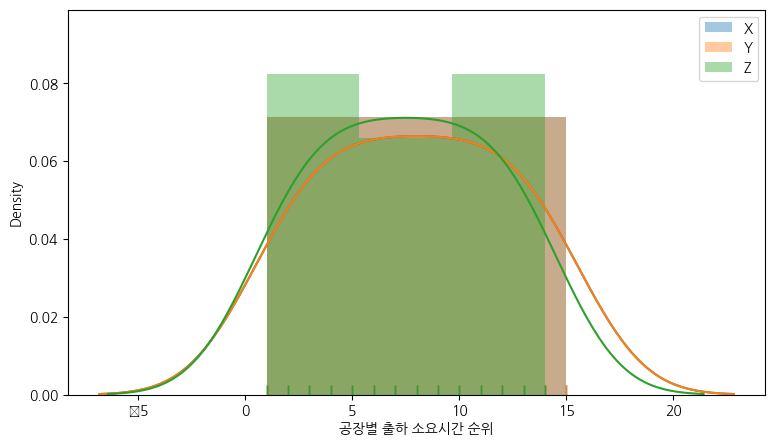

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
print(df.head())
plt.figure(figsize=(9,5))
df_X = df[df['공장명']=='X']['공장별 출하 소요시간 순위'].reset_index(drop=True)
df_Y = df[df['공장명']=='Y']['공장별 출하 소요시간 순위'].reset_index(drop=True)
df_Z = df[df['공장명']=='Z']['공장별 출하 소요시간 순위'].reset_index(drop=True)
sns.distplot(df_X,kde=True, rug=True, label='X')
sns.distplot(df_Y,kde=True, rug=True, label='Y')
sns.distplot(df_Z,kde=True, rug=True, label='Z')
plt.legend()

KruskalResult(statistic=0.1249463430741201, pvalue=0.9394382661600987)

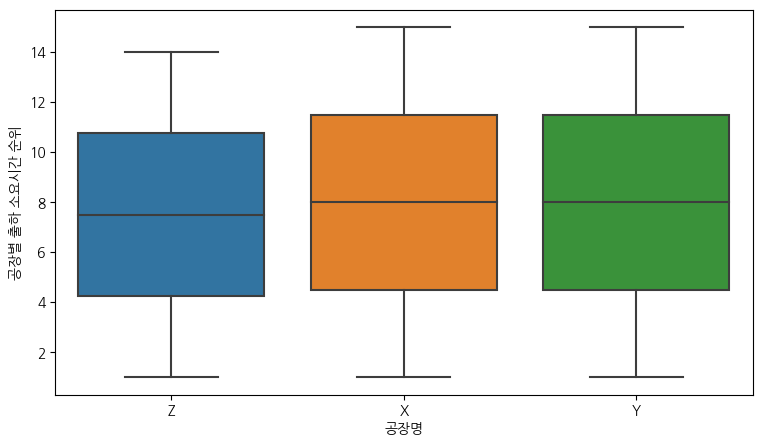

In [14]:
plt.figure(figsize=(9,5))
sns.boxplot(x="공장명", y="공장별 출하 소요시간 순위", data=df)
from scipy.stats import kruskal
kruskal(df_X, df_Y, df_Z)

• 중간 순위에 대한 검증이므로, 비모수적 검증 방법인 Kruskal 사용  
• pvalue 값이 0.94 이므로, 귀무가설 채택  
• 공장 X,Y,Z 의 출하 소요시간 중위수가 모두 같다.  

# Problem 6

1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을
제시하시오.

In [15]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[10,20,15],[15,14,19],[12,11,30],[13,25,20],[16,30,24]],
columns=['1개년','2개년','3개년'],
index=['1안','2안','3안','4안','5안'])
df['sum'] =df.sum(axis=1)
print(df.head())

    1개년  2개년  3개년  sum
1안   10   20   15   45
2안   15   14   19   48
3안   12   11   30   53
4안   13   25   20   58
5안   16   30   24   70


In [1]:
# 선형 최적화 Problem (상한 제한치)
from pulp import *
# 문제 정의
LP = LpProblem( name='LP', sense = LpMaximize)
# 변수 정의(category: "continuous"(default, "Integer", 'Binary'))
X1 = LpVariable(name='1안', lowBound=0, upBound=1, cat='Integer')
X2 = LpVariable(name='2안', lowBound=0, upBound=1, cat='Integer')
X3 = LpVariable(name='3안', lowBound=0, upBound=1, cat='Integer')
X4 = LpVariable(name='4안', lowBound=0, upBound=1, cat='Integer')
X5 = LpVariable(name='5안', lowBound=0, upBound=1, cat='Integer')
# 목적함수(Cost Function)
LP.objective = 45*X1 + 48*X2 + 53*X3 + 58*X4 + 70*X5
# 제한조건
constraints = [
10*X1 +15*X2 + 12*X3 + 13*X4 + 16*X5 <= 50,
20*X1 +14*X2 + 11*X3 + 25*X4 + 30*X5 <= 60,
15*X1 +19*X2 + 30*X3 + 20*X4 + 24*X5 <= 70,
]
# print('Constraints: ')
# for i in constraints:
# print(i)
for i, c in enumerate(constraints):
    constraint_name = f"const_{i}"
    LP.constraints[constraint_name] = c
    print(f'constraints i:{i}, c:{c}')
# 최적해 탐색
opt = LP.solve()
print(f'\n>>> 최적안 선정 결과:')
for v in LP.variables():
    print(f'{v}: {v.varValue: 2.0f} ')
    
print(f'>>> NPV 최대값: {value(LP.objective)}')

constraints i:0, c:10*1안 + 15*2안 + 12*3안 + 13*4안 + 16*5안 <= 50
constraints i:1, c:20*1안 + 14*2안 + 11*3안 + 25*4안 + 30*5안 <= 60
constraints i:2, c:15*1안 + 19*2안 + 30*3안 + 20*4안 + 24*5안 <= 70

>>> 최적안 선정 결과:
1안:  0 
2안:  1 
3안:  1 
4안:  1 
5안:  0 
>>> NPV 최대값: 159.0


• 상한치 제한 조건을 갖는 선형 최적화 문제 해석  
• 최적안 선정: 2안, 3안, 4안 , 최대 NPV: 159